In [1]:
#Box number 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Box number 2
def clean_large_data(df):
    df = df[df['season_type'] == 'REG']
    df = df[df['season'] == 2024]
    return df

In [3]:
#Box number 3
off_week_data_raw = pd.DataFrame(pd.read_csv("weekly_team_stats_offense.csv"))
def_week_data_raw = pd.DataFrame(pd.read_csv("weekly_team_stats_defense.csv"))

def clean_week_data(df):
    df = df[df['season_type'] == 'REG']
    df = df[df['season'] == 2024]
    return df

off_week_data = clean_week_data(off_week_data_raw)
def_week_data = clean_week_data(def_week_data_raw)

In [4]:
#Box number 4
def get_previous_weeks_home(df, home_team, week):
    off_home_team = df[df['team'] == home_team]
    if week == 1:
        print("Can not calculate from no data please make sure the week is 2 or above.")
        
    if week > 18:
        print("Can not go into the postseason there are only 18 weeks in the regular season.")
        
    return off_home_team[off_home_team["week"] < week]


In [5]:
#Box number 5
def get_previous_weeks_away(df, home_team, week):
    if week == 1:
        print("Can not calculate from no data please make sure the week is 2 or above.")
        
    if week > 18:
        print("Can not go into the postseason there are only 18 weeks in the regular season.")
    off_home_team = df[df['team'] == home_team]
    game = off_home_team[off_home_team['week'] == week]['game_id'].values
    df2 = df[df['game_id'].isin(game)]
    away_team = df2[df2['team'] != home_team]['team'].values[0]
    away_team_df = df[(df['team'] == away_team)&(df['week']<week)]
    return away_team_df, away_team


In [6]:
#Box number 6
def home_points(df_off, df_def, home_team, week):
    total_points = 0
    off_home_team = off_week_data[off_week_data['team'] == home_team]
    def_home_team = def_week_data[def_week_data['team'] == home_team]
    previous_offense_home = get_previous_weeks_home(df_off, home_team, week)
    previous_defense_home = get_previous_weeks_home(df_def, home_team, week)
    total_points = total_points + previous_offense_home['total_off_yards'].sum()
    total_points = total_points + (previous_offense_home['total_tds'].sum() * 70)
    total_points = total_points + (previous_offense_home['field_goal'].sum() * 30)
    total_points = total_points + (previous_offense_home['extra_point'].sum() * 10)
    total_points = total_points + ((previous_offense_home['first_down_rush'].sum() + previous_offense_home['first_down_pass'].sum()) * 10)
    total_points = total_points + (previous_defense_home['sack'].sum() * 20)
    total_points = total_points + (previous_defense_home['interception'].sum() * 50)
    return total_points, home_team

In [7]:
#Box number 7
def away_points(df_off, df_def, home_team, week):
    total_points = 0
    previous_offense_home = get_previous_weeks_away(df_off, home_team, week)[0]
    previous_defense_home = get_previous_weeks_away(df_def, home_team, week)[0]
    away_team = get_previous_weeks_away(df_def, home_team, week)[1]
    off_away_team = off_week_data[off_week_data['team'] == away_team]
    def_away_team = def_week_data[def_week_data['team'] == away_team]
    total_points = total_points + previous_offense_home['total_off_yards'].sum()
    total_points = total_points + (previous_offense_home['total_tds'].sum() * 70)
    total_points = total_points + (previous_offense_home['field_goal'].sum() * 30)
    total_points = total_points + (previous_offense_home['extra_point'].sum() * 10)
    total_points = total_points + ((previous_offense_home['first_down_rush'].sum() + previous_offense_home['first_down_pass'].sum()) * 10)
    total_points = total_points + (previous_defense_home['sack'].sum() * 20)
    total_points = total_points + (previous_defense_home['interception'].sum() * 50)
    return total_points, away_team

In [8]:
#Box number 8
def win_percentage(home, away):
    total = home + away
    home_percentage = home/total*100
    away_percentage = away/total*100

    return home_percentage, away_percentage

Enter a team:  GB
Enter what week you want calculated:  9


GB: 51.40% | DET: 48.60%


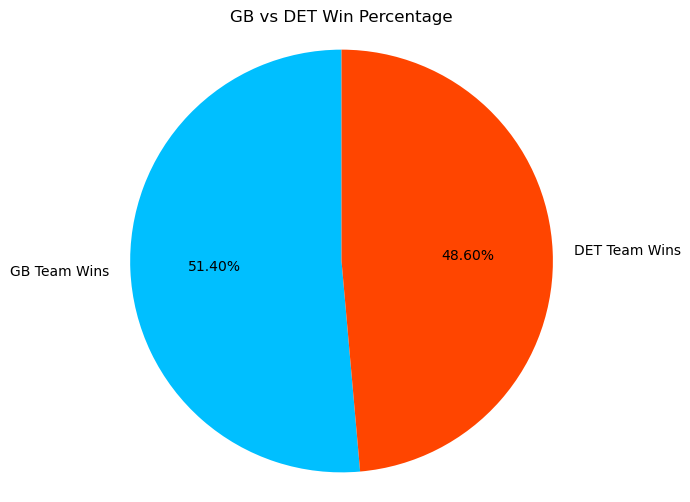

In [31]:
#Box number 9
team = str(input("Enter a team: "))
week = int(input("Enter what week you want calculated: "))


h_point_total = home_points(off_week_data, def_week_data, team, week)[0]
a_point_total = away_points(off_week_data, def_week_data, team, week)[0]

home_team = home_points(off_week_data, def_week_data, team, week)[1]
away_team = away_points(off_week_data, def_week_data, team, week)[1]
home_pct, away_pct = win_percentage(h_point_total, a_point_total)

print(f"{home_team}: {home_pct:.2f}% | {away_team}: {away_pct:.2f}%")

labels = [f'{home_team} Team Wins', f'{away_team} Team Wins']
sizes = [home_pct, away_pct]

plt.figure(figsize=(6,6))

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors = ['deepskyblue', 'orangered']) #Gives the Numbers for 2 decimal points and starts at the top
plt.title(f'{home_team} vs {away_team} Win Percentage')
plt.axis('equal')  # Makes the chart a pie

plt.show()